# Librerias

In [37]:
pip -q install sklearn

In [38]:
pip -q install dataprep

In [39]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from pandas.core.common import random_state
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from dataprep.eda import create_report
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd
import numpy as np
import pickle

# 1 - Recoleccion de data

In [40]:
#https://www.kaggle.com/datasets/gauravduttakiit/smoker-status-prediction?select=train_dataset.csv
df = pd.read_csv("/content/train_dataset.csv")
df.head(5)

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0


# 2 - Preparacion de la data / Preprocesamiento de la data

In [41]:
df.drop(['waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)'], axis=1, inplace=True)

df = df.rename(columns={'height(cm)':'height', 'weight(kg)':'weight', 'fasting blood sugar':'sugar',
       'Urine protein':'UrineProtein', 'serum creatinine':'Creatinine', 'dental caries':'Caries'})

In [42]:
df.isna().any()

age             False
height          False
weight          False
systolic        False
relaxation      False
sugar           False
Cholesterol     False
triglyceride    False
HDL             False
LDL             False
hemoglobin      False
UrineProtein    False
Creatinine      False
AST             False
ALT             False
Gtp             False
Caries          False
smoking         False
dtype: bool

In [43]:
df['smoking'].value_counts()

0    24666
1    14318
Name: smoking, dtype: int64

In [44]:
no_fumador = resample(df[df['smoking'] == 0], replace=False, random_state=2, n_samples=10000)
fumador = resample(df[df['smoking'] == 1], replace=False, random_state=2, n_samples=10000)

df = pd.concat([no_fumador, fumador])

df.head(5)

,age,height,weight,systolic,relaxation,sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,UrineProtein,Creatinine,AST,ALT,Gtp,Caries,smoking
34126,50,160,60,119,70,103,223,94,64,140,13.8,1,0.7,20,14,13,0,0
32637,55,155,50,92,61,91,189,51,64,115,13.2,3,0.9,19,12,13,0,0
27570,45,165,65,140,89,129,150,91,55,77,16.9,1,0.8,182,311,231,0,0
15714,40,155,65,142,89,98,199,74,59,125,14.3,1,0.5,15,15,22,0,0
24697,40,155,50,120,90,97,244,141,83,132,14.5,1,0.7,22,20,35,0,0


In [45]:
df[df['smoking'] == 1]

,age,height,weight,systolic,relaxation,sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,UrineProtein,Creatinine,AST,ALT,Gtp,Caries,smoking
5368,40,175,70,110,68,89,202,162,58,112,14.4,1,1.1,17,26,28,0,1
16547,50,175,65,130,93,97,212,186,49,126,16.2,2,1.1,35,34,35,0,1
27912,50,170,60,114,66,101,173,185,51,85,14.4,1,0.8,24,12,45,1,1
31154,40,165,65,118,84,104,195,261,45,98,14.2,1,1.3,27,33,103,0,1
25231,25,175,80,110,70,92,168,47,53,106,15.8,1,1.2,20,36,61,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26821,50,170,70,112,74,101,271,188,54,179,16.0,1,1.1,25,23,63,0,1
4814,25,175,75,108,62,89,133,39,62,63,15.1,1,1.0,29,30,30,0,1
29130,55,175,60,120,80,100,175,72,69,92,14.0,1,0.9,49,41,62,0,1
32792,40,165,60,109,73,185,161,115,71,910,15.3,1,1.0,32,70,43,0,1


# 3 - Análisis descriptivo de la data (EDA)

In [14]:
rep = create_report(df)
rep.save("Reporte")

Report has been saved to Reporte.html!


In [15]:
df.columns

Index(['age', 'height', 'weight', 'systolic', 'relaxation', 'sugar',
       'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin',
       'UrineProtein', 'Creatinine', 'AST', 'ALT', 'Gtp', 'Caries', 'smoking'],
      dtype='object')

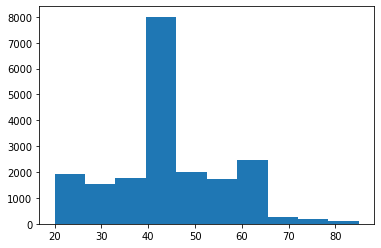

In [69]:
plt.hist(df['age'])
plt.show()

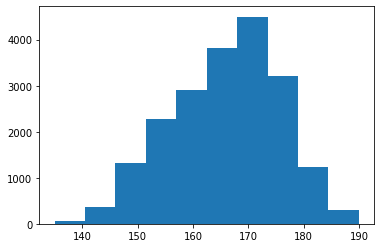

In [68]:
plt.hist(df['height'])
plt.show()

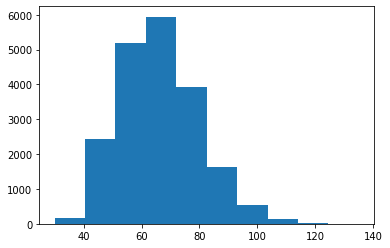

In [67]:
plt.hist(df['weight'])
plt.show()

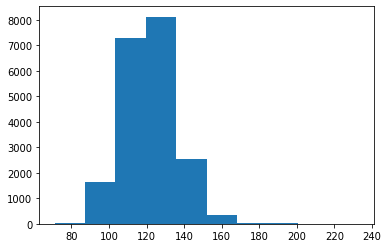

In [66]:
plt.hist(df['systolic'])
plt.show()

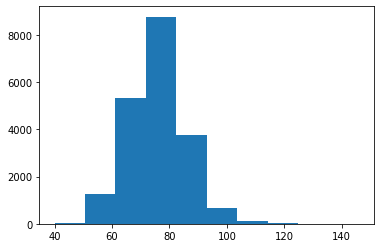

In [56]:
plt.hist(df['relaxation'])
plt.show()

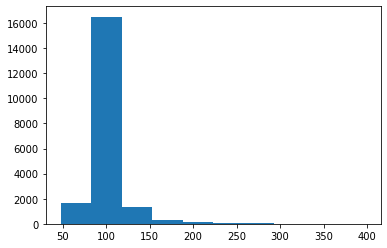

In [70]:
plt.hist(df['sugar'])
plt.show()

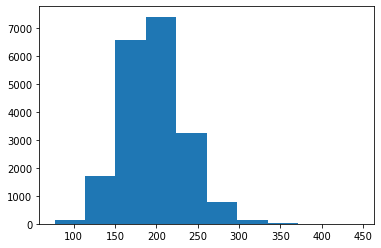

In [71]:
plt.hist(df['Cholesterol'])
plt.show()

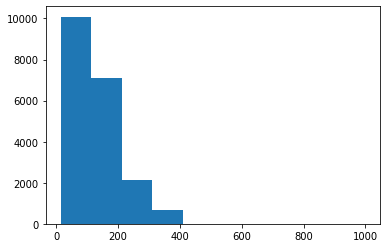

In [72]:
plt.hist(df['triglyceride'])
plt.show()

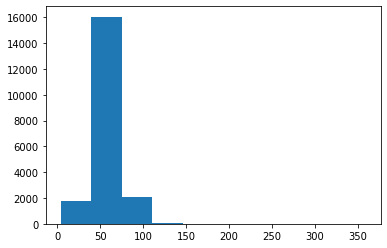

In [73]:
plt.hist(df['HDL'])
plt.show()

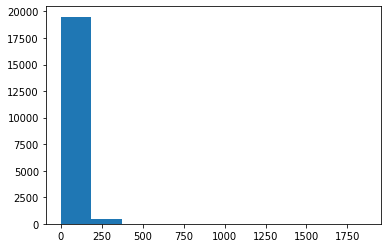

In [74]:
plt.hist(df['LDL'])
plt.show()

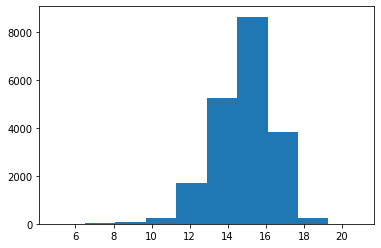

In [75]:
plt.hist(df['hemoglobin'])
plt.show()

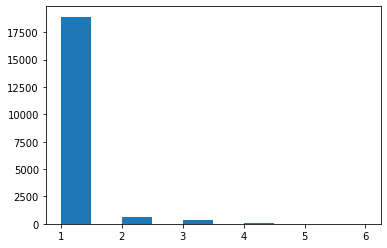

In [76]:
plt.hist(df['UrineProtein'])
plt.show()

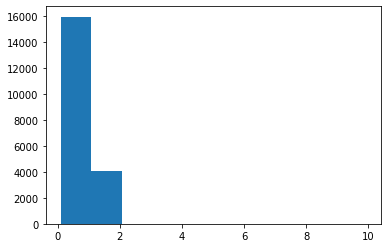

In [77]:
plt.hist(df['Creatinine'])
plt.show()

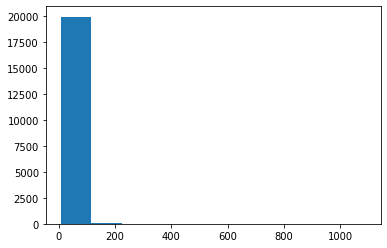

In [78]:
plt.hist(df['AST'])
plt.show()

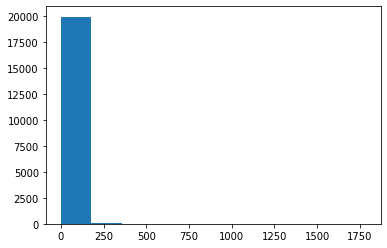

In [79]:
plt.hist(df['ALT'])
plt.show()

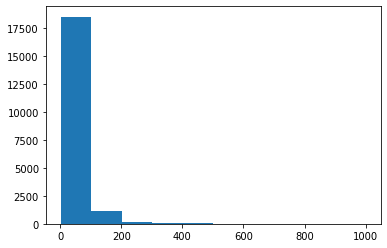

In [80]:
plt.hist(df['Gtp'])
plt.show()

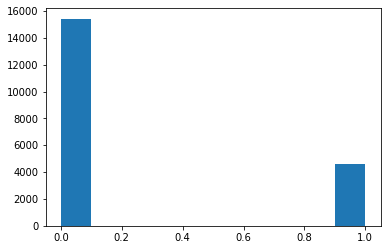

In [81]:
plt.hist(df['Caries'])
plt.show()

# 4 - Entrenamiento del modelo.

In [46]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [57]:
x

,age,height,weight,systolic,relaxation,sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,UrineProtein,Creatinine,AST,ALT,Gtp,Caries
34126,50,160,60,119,70,103,223,94,64,140,13.8,1,0.7,20,14,13,0
32637,55,155,50,92,61,91,189,51,64,115,13.2,3,0.9,19,12,13,0
27570,45,165,65,140,89,129,150,91,55,77,16.9,1,0.8,182,311,231,0
15714,40,155,65,142,89,98,199,74,59,125,14.3,1,0.5,15,15,22,0
24697,40,155,50,120,90,97,244,141,83,132,14.5,1,0.7,22,20,35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26821,50,170,70,112,74,101,271,188,54,179,16.0,1,1.1,25,23,63,0
4814,25,175,75,108,62,89,133,39,62,63,15.1,1,1.0,29,30,30,0
29130,55,175,60,120,80,100,175,72,69,92,14.0,1,0.9,49,41,62,0
32792,40,165,60,109,73,185,161,115,71,910,15.3,1,1.0,32,70,43,0


In [47]:
numerical_columns = x.columns[(x.dtypes == "float64") | (x.dtypes == "int64")]

col_transf = make_column_transformer(
    (StandardScaler(), numerical_columns),
)

In [48]:
col_transf

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 Index(['age', 'height', 'weight', 'systolic', 'relaxation', 'sugar',
       'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin',
       'UrineProtein', 'Creatinine', 'AST', 'ALT', 'Gtp', 'Caries'],
      dtype='object'))])

In [49]:
x_train, x_val, y_train, y_val = train_test_split(x, y, random_state=2, train_size = 0.75)

In [50]:
modelos = []
modelos.append(("KNC", KNeighborsClassifier()))
modelos.append(("RFC", RandomForestClassifier()))
modelos.append(("SVC", svm.SVC()))
modelos.append(("MLP", MLPClassifier()))
modelos.append(("GNB", GaussianNB()))

In [51]:
pipelines  = {nombre: make_pipeline(col_transf, modelo) for nombre, modelo in modelos}

In [58]:
results = []
for name, pipeline in pipelines.items():
	cv_results = cross_val_score(pipeline, x_train, y_train, cv=5, scoring='accuracy', error_score='raise')
	results.append({name: cv_results})

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

In [59]:
results

[{'KNC': array([0.706     , 0.69933333, 0.71066667, 0.71933333, 0.709     ])},
 {'RFC': array([0.77366667, 0.77266667, 0.76933333, 0.77533333, 0.767     ])},
 {'SVC': array([0.75133333, 0.73966667, 0.74266667, 0.76066667, 0.75466667])},
 {'MLP': array([0.745     , 0.74033333, 0.743     , 0.758     , 0.74333333])},
 {'GNB': array([0.66133333, 0.65366667, 0.66366667, 0.66666667, 0.66966667])}]

In [60]:
best_model = sorted(results, key=lambda x: list(x.values())[0].mean(), reverse=True)[0]
best_pipeline = pipelines[list(best_model.keys())[0]]

# 5. Validación y testeo del modelo.

In [61]:
best_pipeline.fit(x_train, y_train)
best_pipeline.predict(x_val)

array([0, 0, 1, ..., 0, 1, 1])

In [62]:
y_true = y_val
y_pred = best_pipeline.predict(x_val)

In [63]:
cr = classification_report(y_true, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.69      0.75      2433
           1       0.74      0.85      0.79      2567

    accuracy                           0.77      5000
   macro avg       0.78      0.77      0.77      5000
weighted avg       0.78      0.77      0.77      5000



In [64]:
print(confusion_matrix(y_true, y_pred))

[[1681  752]
 [ 378 2189]]


# 6. Despliegue del modelo y comprobación con data recién creada.

In [65]:
pickle.dump(best_pipeline, open('bp.pkl', mode = 'wb')) 

In [ ]:
import pandas as pd
import sklearn
import pickle

if __name__ == '__main__':
  bp_mod = pickle.load(open('bp.pkl', mode = 'rb'))

  print("Bienvenid@!\n\tDigita los datos del paciente...\n")
  
  edad = input('  Edad: ')
  altura = input('  Altura(cm): ')
  peso = input('  Peso(kg): ')
  sys = input('  Presion sistolica: ')
  sangre = input('  Relajacion o presion en sangre: ')
  glucemia = input('  Glucosa en ayunas: ')
  colesterol = input('  Colesterol total: ')
  triglicelidos = input('  Triglicelidos: ')
  hdl = input('  Colesterol bueno(HDL): ')
  ldl = input('  Colesterol malo(LDL): ')
  hemoglobina = input('  Hemoglobina: ')
  proteina_orina = input('  Proteina en orina: ')
  sc = input('  Creatinina Serica: ')
  ast = input('  Aspartato Aminotransferasa(AST): ')
  alt = input('  Alanina Aminotransferasa(ALT): ')
  gtp = input('  Guanosina trisfosfato(GTP): ')
  cd = input('  Caries Dentales: ')

  a = pd.DataFrame([edad, altura, peso, sys, sangre, glucemia, colesterol, triglicelidos, hdl, ldl, hemoglobina, proteina_orina, sc, ast, alt, gtp, cd])
  a = a.transpose().rename(columns={0:'age', 1:'height', 2:'weight', 3:'systolic', 4:'relaxation', 5:'sugar', 6:'Cholesterol', 7:'triglyceride', 8:'HDL', 9:'LDL', 10:'hemoglobin', 11:'UrineProtein', 12:'Creatinine', 13:'AST', 14:'ALT', 15:'Gtp', 16:'Caries'})

  prediccion = bp_mod.predict(a)

  if prediccion[0] == 1:
    print("\n\tEl paciente es fumador ",prediccion[0])
  else:
    print("\n\tEl paciente no es fumador ",prediccion[0])

Bienvenid@!
	Digita los datos del paciente...

  Edad: 20
  Altura(cm): 174
  Peso(kg): 90
  Presion sistolica: 80
  Relajacion o presion en sangre: 100
  Glucosa en ayunas: 60
  Colesterol total: 200
  Triglicelidos: 160
  Colesterol bueno(HDL): 70
  Colesterol malo(LDL): 70
  Hemoglobina: 15
  Proteina en orina: 3
  Creatinina Serica: 1.4
  Aspartato Aminotransferasa(AST): 30
  Alanina Aminotransferasa(ALT): 30
  Guanosina trisfosfato(GTP): 30
  Caries Dentales: 1

	El paciente es fumador  1


In [82]:
bp_mod

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  Index(['age', 'height', 'weight', 'systolic', 'relaxation', 'sugar',
       'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin',
       'UrineProtein', 'Creatinine', 'AST', 'ALT', 'Gtp', 'Caries'],
      dtype='object'))])),
                ('randomforestclassifier', RandomForestClassifier())])

In [83]:
bp_mod[1].feature_importances_

array([0.04407627, 0.11648351, 0.05176017, 0.04818675, 0.04703316,
       0.05154389, 0.05395464, 0.07146395, 0.05463896, 0.05376567,
       0.13287303, 0.00465236, 0.04898384, 0.04651945, 0.05425479,
       0.11054624, 0.00926332])